In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score

import time


In [2]:
problem = 'P1'

dataset = pd.read_pickle('online_shoppers_intention.pkl')


df = pd.read_csv('UniversalBank.csv')
df.head(10)
df.drop(['ID','ZIP Code'],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


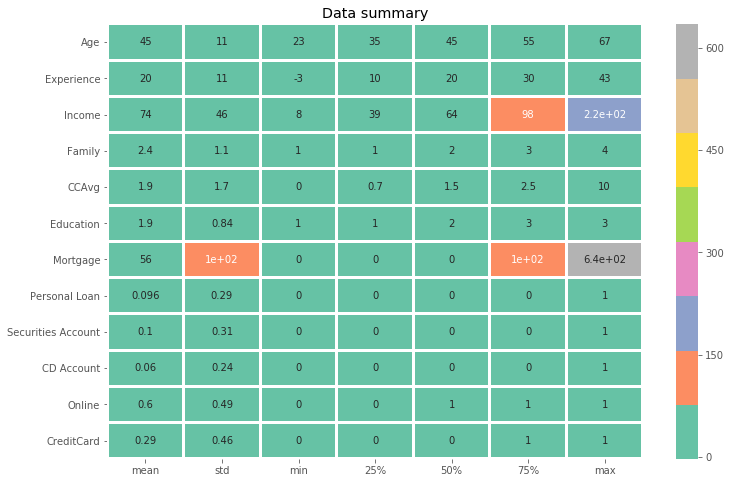

In [3]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

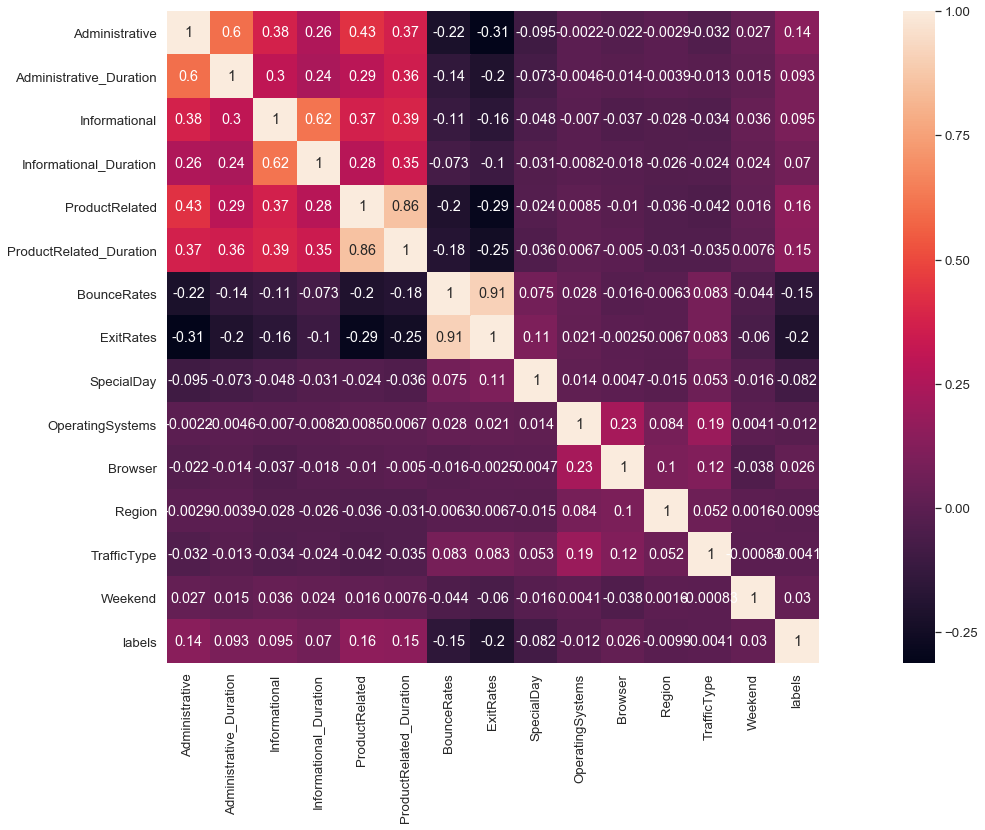

In [29]:
df = pd.read_pickle('online_shoppers_intention.pkl')

problem = 'P2'
cor_mat= df[:].corr()
# mask = np.array(cor_mat)
# mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,square=True,annot=True,cbar=True)
sns.set(font_scale=1.4)
fig.savefig(problem + '_corr.png',dpi=fig.dpi)
plt.show()

In [30]:
corr=df.corr()
# corr.sort_values(by=["Personal Loan"],ascending=False).iloc[0].sort_values(ascending=False)
corr.sort_values(by=["labels"],ascending=False).iloc[0].sort_values(ascending=False)

labels                     1.000000
ProductRelated             0.158276
ProductRelated_Duration    0.152119
Administrative             0.138743
Informational              0.095174
Administrative_Duration    0.093491
Informational_Duration     0.070207
Weekend                    0.029553
Browser                    0.025683
TrafficType               -0.004112
Region                    -0.009925
OperatingSystems          -0.012005
SpecialDay                -0.082083
BounceRates               -0.148753
ExitRates                 -0.204922
Name: labels, dtype: float64

In [32]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,labels
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,2.0,2.0,1.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,3.0,2.0,2.0,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,3.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,4.0,6.0,1.0,1.0,1.0,0.0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,3.0,2.0,1.0,8.0,1.0,0.0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.0,3.0,2.0,1.0,13.0,1.0,0.0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,2.0,2.0,3.0,11.0,0.0,0.0


KeyError: 'lables'

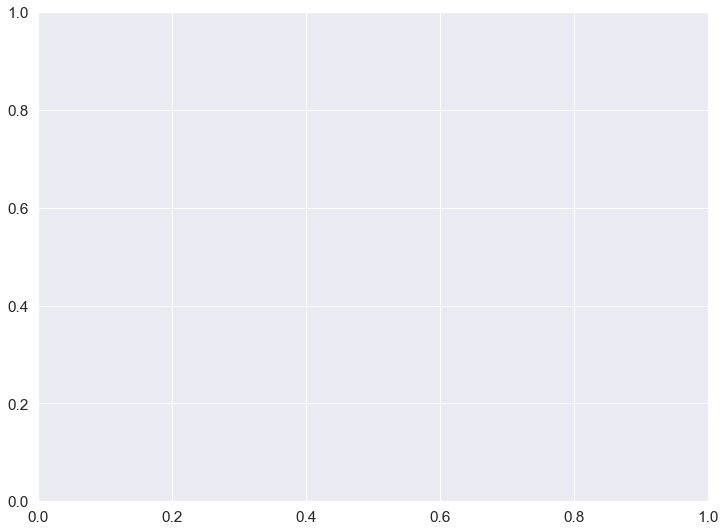

In [31]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
explode = (0.1,0)  
fig, ax = plt.subplots(figsize=(12,9))
# ax.pie(df['Personal Loan'].value_counts(), explode=explode,labels=['Customers don\'t have loan','Customers have loan'], autopct='%1.1f%%',
#         shadow=True)
ax.pie(df['lables'].value_counts(), explode=explode,labels=['Buy Customers','Not-Buy Customers'], autopct='%1.1f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.legend()
fig.tight_layout()
fig.savefig(problem + '_yesno.png',dpi=fig.dpi)
plt.show()

In [33]:

# X = df.drop('Personal Loan',axis=1)
# y = df['Personal Loan']

X = df.drop('labels',axis=1)
y = df['labels']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Decision Tree

0.0293


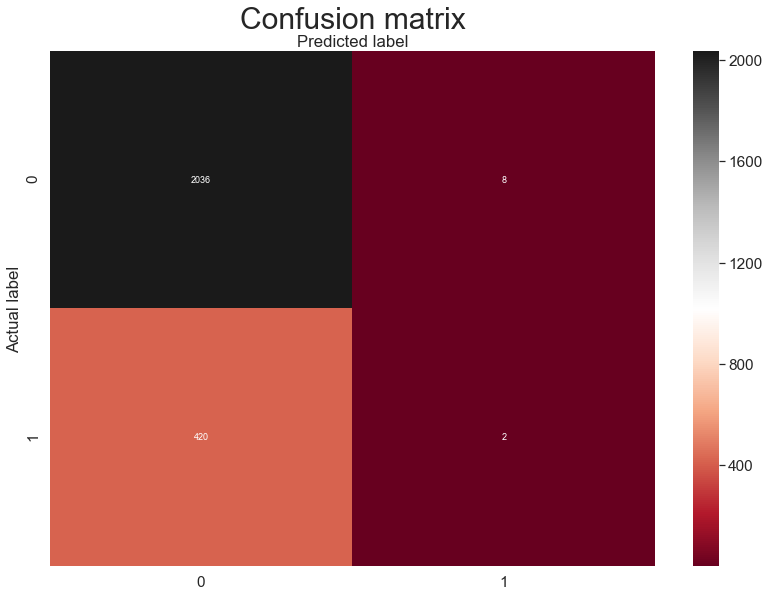

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90      2044
         1.0       0.20      0.00      0.01       422

    accuracy                           0.83      2466
   macro avg       0.51      0.50      0.46      2466
weighted avg       0.72      0.83      0.75      2466

5
Accuracy: 0.8264395782643957


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


4.3656


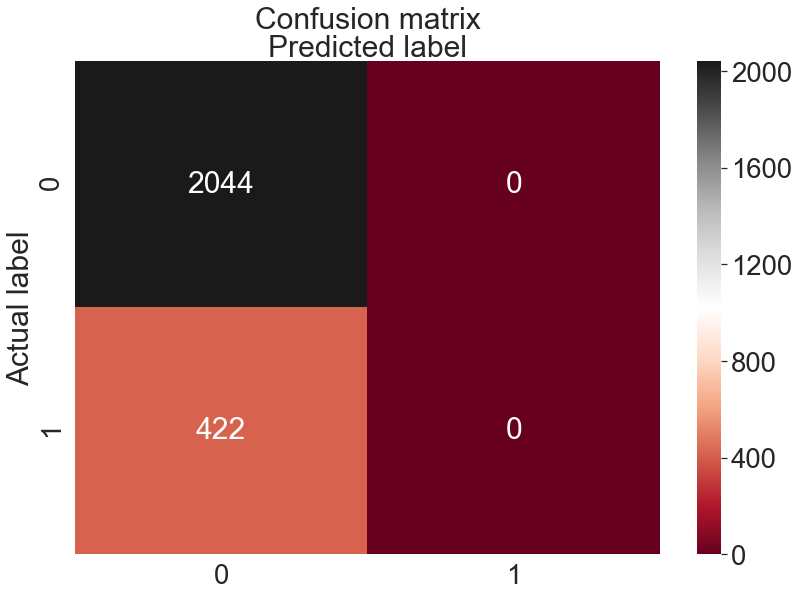

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       0.00      0.00      0.00       422

    accuracy                           0.83      2466
   macro avg       0.41      0.50      0.45      2466
weighted avg       0.69      0.83      0.75      2466

Accuracy: 0.8288726682887266
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'random'}
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      2044
         1.0       0.29      0.28      0.29       422

    accuracy                           0.76      2466
   macro avg       0.57      0.57      0.57      2466
weighted avg       0.76      0.76      0.76      2466

43
Accuracy: 0.7558799675587997


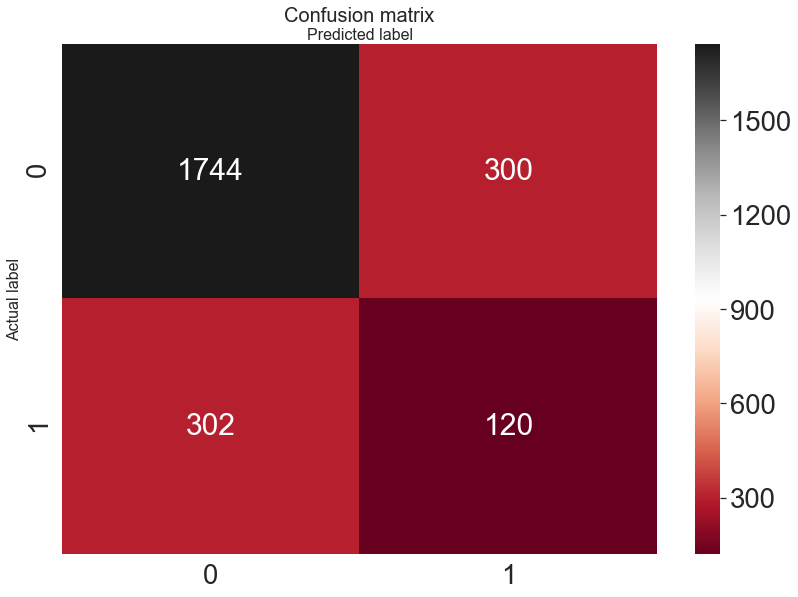

In [34]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
sns.set(font_scale=2.5)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_dt.png',dpi=fig.dpi)
plt.show()
print(classification_report(y_test,y_pred))
print(dt.get_depth())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


parameters = {'criterion':('gini', 'entropy'),
              'splitter':('best','random'),'max_depth':[3,4,5,6,7],
              'min_samples_leaf':[1,2,3,4,6,8]}
start_time = time.time()
dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, parameters)
dt_gs.fit(X_train, y_train)
y_pred = dt_gs.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_dt_gs.png',dpi=fig.dpi)
plt.show()
print(classification_report(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(dt_gs.best_params_)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
sns.set(font_scale=2.5)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=20)
plt.ylabel('Actual label', fontsize=16)
plt.xlabel('Predicted label',fontsize=16)

print(classification_report(y_test,y_pred))
print(dt.get_depth())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig.tight_layout()
fig.savefig(problem + '_dt_unlimit.png',dpi=fig.dpi)
plt.show()

# Boosting

0.2194


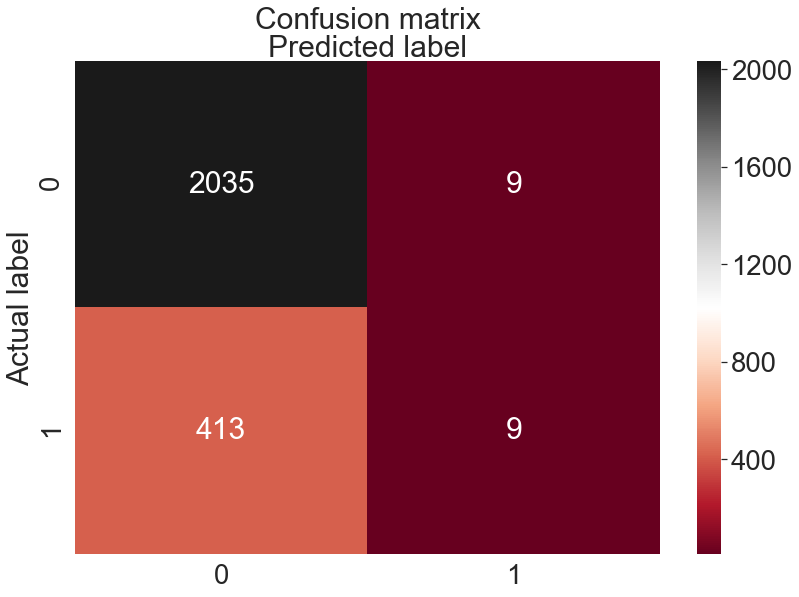

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       0.50      0.02      0.04       422

    accuracy                           0.83      2466
   macro avg       0.67      0.51      0.47      2466
weighted avg       0.77      0.83      0.76      2466

Accuracy: 0.8288726682887266


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


208.7073


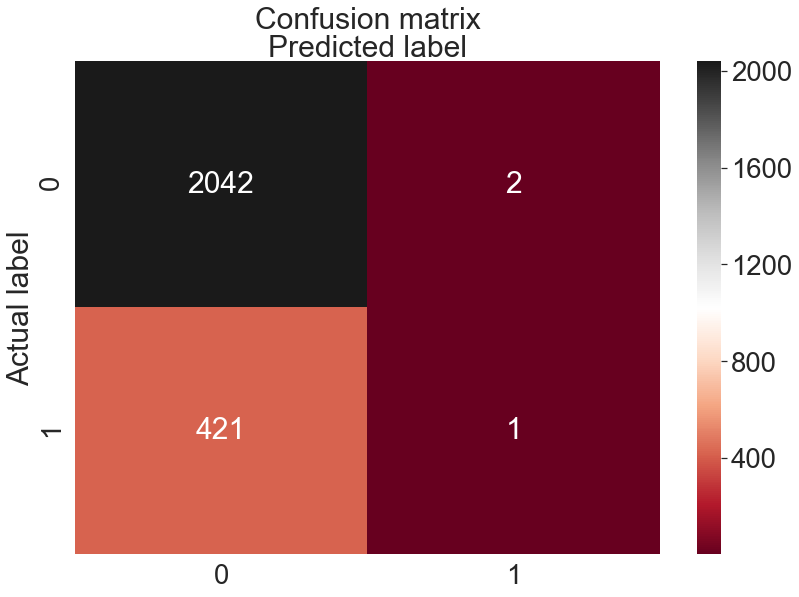

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       0.33      0.00      0.00       422

    accuracy                           0.83      2466
   macro avg       0.58      0.50      0.46      2466
weighted avg       0.74      0.83      0.75      2466

Accuracy: 0.8284671532846716
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
[0.8493514470042369, 0.8493514470042369, 0.8493514470042369, 0.8493514470042369, 0.8493514470042369, 0.8493514470042369, 0.8493515497599393, 0.8486422273547218, 0.8482361359841635, 0.8424580777858998, 0.8230949914293919]


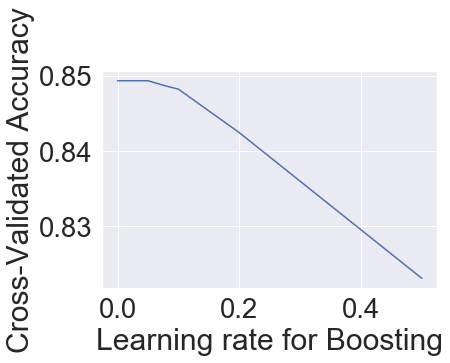

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)

y_pred = boosting_model.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_boost.png',dpi=fig.dpi)
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "n_estimators":[10,50,200]
    }
start_time = time.time()
Boost = GradientBoostingClassifier()
Boost_gs = GridSearchCV(Boost, parameters)
Boost_gs.fit(X_train, y_train)
y_pred = Boost_gs.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_boost_best.png',dpi=fig.dpi)
plt.show()
print(classification_report(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(Boost_gs.best_params_)


lr_range = [1e-5,1e-4,1e-3,1e-2,.02,.03,.05,.08,.1,.2,.5]

# list of scores from k_range
lr_scores = []

# 1. we will loop through reasonable values of k
for lr in lr_range:
    # 2. run KNeighborsClassifier with k neighbours
    boosting = GradientBoostingClassifier(n_estimators=10, learning_rate=lr,
     max_depth=8, random_state=0)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(boosting, X_train,y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    lr_scores.append(scores.mean())
print(lr_scores)

plt.plot(lr_range, lr_scores)
plt.xlabel('Learning rate for Boosting')
plt.ylabel('Cross-Validated Accuracy')
fig.tight_layout()
fig.savefig(problem + '_boost_lr.png',dpi=fig.dpi)
plt.show()

# SVM

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


6.142
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       0.00      0.00      0.00       422

    accuracy                           0.83      2466
   macro avg       0.41      0.50      0.45      2466
weighted avg       0.69      0.83      0.75      2466

Accuracy: 0.8280616382806164


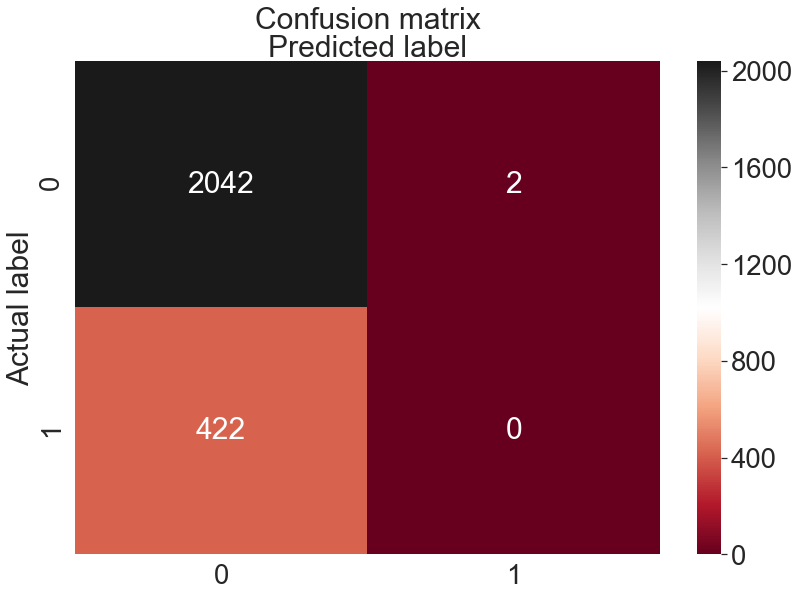

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


147.2581


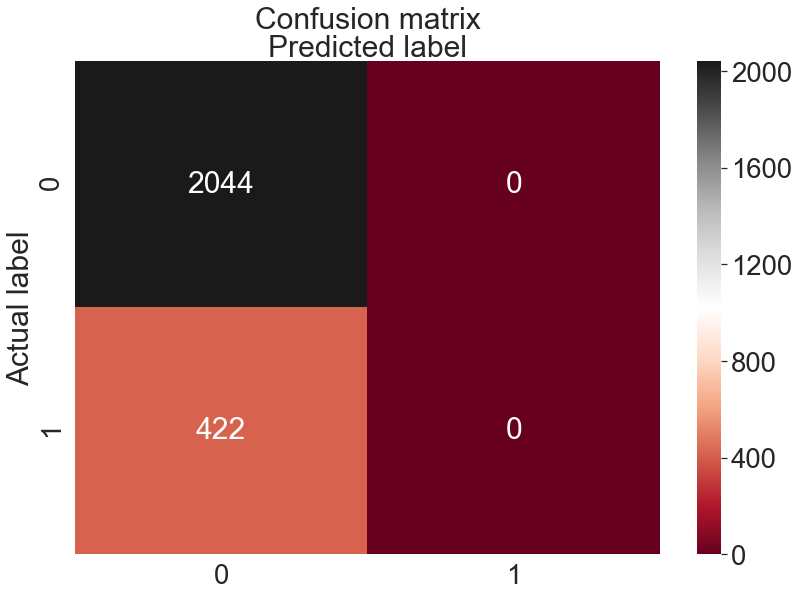

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       0.00      0.00      0.00       422

    accuracy                           0.83      2466
   macro avg       0.41      0.50      0.45      2466
weighted avg       0.69      0.83      0.75      2466

Accuracy: 0.8288726682887266
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
from sklearn.svm import SVC
start_time = time.time()
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print(classification_report(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig.tight_layout()
fig.savefig(problem + '_svm.png',dpi=fig.dpi)
plt.show()
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001], 
             'kernel': ['rbf']}  
start_time = time.time()
svc = SVC()
svc_gs = GridSearchCV(svc, parameters)
svc_gs.fit(X_train, y_train)
y_pred = svc_gs.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_svm_gs.png',dpi=fig.dpi)
plt.show()
print(classification_report(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(svc_gs.best_params_)

# KNN

0.1343


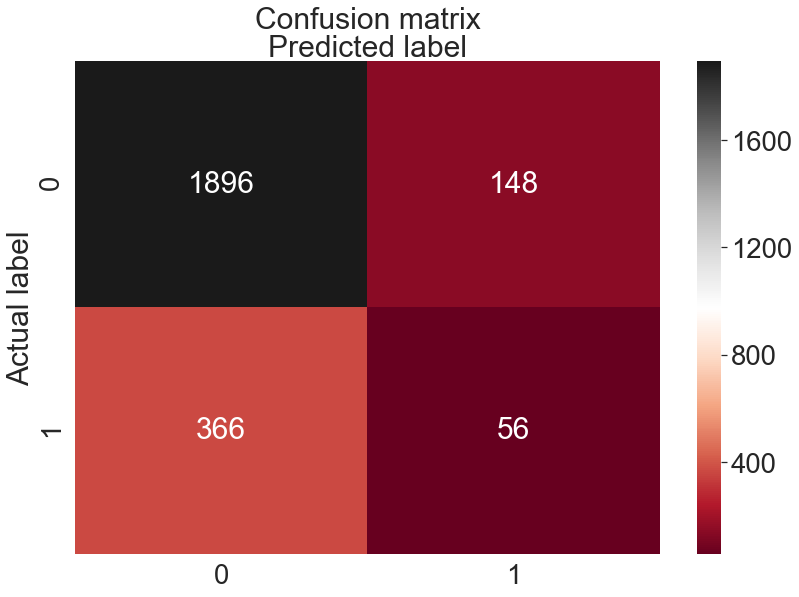

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      2044
         1.0       0.27      0.13      0.18       422

    accuracy                           0.79      2466
   macro avg       0.56      0.53      0.53      2466
weighted avg       0.74      0.79      0.76      2466

Accuracy: 0.7915652879156528
[0.7600374899746686, 0.8304960763647833, 0.8045416187561685, 0.8353614588313659, 0.822792480519214, 0.8392145929955642, 0.8315089397408952, 0.8424568440915478, 0.8364765632968295, 0.8437757152013352, 0.8412405246332699, 0.8454987226110022, 0.8428628322891216, 0.84712082496409, 0.8452955743786615, 0.8472225535267756, 0.8465134364243218, 0.8477297562998818, 0.8471215452972121, 0.8485403960363339, 0.8481351275459591, 0.8487434415129721, 0.8484393873894884, 0.8490474956364557, 0.848439284425145, 0.8491488127590493, 0.8488445529155199, 0.8493514470042369, 0.8493514470042369, 0.8493514470042369]


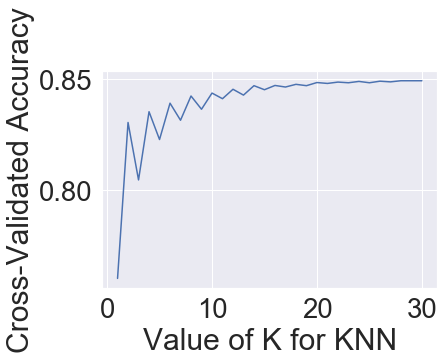

21.864


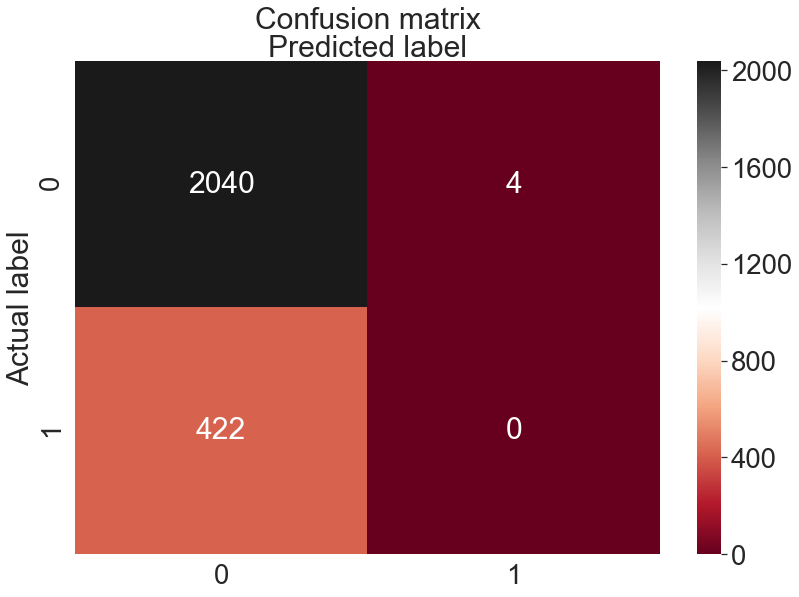

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2044
         1.0       0.00      0.00      0.00       422

    accuracy                           0.83      2466
   macro avg       0.41      0.50      0.45      2466
weighted avg       0.69      0.83      0.75      2466

Accuracy: 0.8272506082725061


In [37]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_train,y_train)
y_pred = neighbors.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_knn.png',dpi=fig.dpi)
plt.show()
print(classification_report(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train,y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
fig.tight_layout()
fig.savefig(problem + '_knn_k.png',dpi=fig.dpi)
plt.show()
neighbors = KNeighborsClassifier(n_neighbors=k_scores.index(max(k_scores)))
neighbors.fit(X_train,y_train)
y_pred = neighbors.predict(X_test)
print(round((time.time() - start_time),4))
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig(problem + '_knn_best.png',dpi=fig.dpi)
plt.show()
print(classification_report(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [38]:
from sklearn.preprocessing import MinMaxScaler

#deep learning package
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

Epoch 1/1000
62/62 [==============================] - 0s 3ms/step - loss: 71.0939 - accuracy: 0.7013 - val_loss: 26.5124 - val_accuracy: 0.8490
Epoch 2/1000
62/62 [==============================] - 0s 1ms/step - loss: 33.6219 - accuracy: 0.7154 - val_loss: 3.3712 - val_accuracy: 0.8490
Epoch 3/1000
62/62 [==============================] - 0s 1ms/step - loss: 19.5660 - accuracy: 0.7122 - val_loss: 5.5992 - val_accuracy: 0.8490
Epoch 4/1000
62/62 [==============================] - 0s 1ms/step - loss: 11.6846 - accuracy: 0.7133 - val_loss: 4.3970 - val_accuracy: 0.8490
Epoch 5/1000
62/62 [==============================] - 0s 1ms/step - loss: 8.4774 - accuracy: 0.7128 - val_loss: 3.6542 - val_accuracy: 0.8490
Epoch 6/1000
62/62 [==============================] - 0s 1ms/step - loss: 6.5953 - accuracy: 0.7169 - val_loss: 3.6685 - val_accuracy: 0.8429
Epoch 7/1000
62/62 [==============================] - 0s 1ms/step - loss: 5.4935 - accuracy: 0.7341 - val_loss: 1.2513 - val_accuracy: 0.8398
E

62/62 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8479 - val_loss: 0.4137 - val_accuracy: 0.8464
Epoch 59/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8474 - val_loss: 0.4147 - val_accuracy: 0.8479
Epoch 60/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8467 - val_loss: 0.4194 - val_accuracy: 0.8434
Epoch 61/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8464 - val_loss: 0.4141 - val_accuracy: 0.8464
Epoch 62/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8445 - val_loss: 0.4193 - val_accuracy: 0.8490
Epoch 63/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8474 - val_loss: 0.4133 - val_accuracy: 0.8474
Epoch 64/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8479 - val_loss: 0.4155 - val_accuracy: 0.8429
Epoch 65/1000

62/62 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8465 - val_loss: 0.4109 - val_accuracy: 0.8469
Epoch 116/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8467 - val_loss: 0.4107 - val_accuracy: 0.8449
Epoch 117/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8475 - val_loss: 0.4198 - val_accuracy: 0.8388
Epoch 118/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8468 - val_loss: 0.4113 - val_accuracy: 0.8444
Epoch 119/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8462 - val_loss: 0.4102 - val_accuracy: 0.8464
Epoch 120/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8478 - val_loss: 0.4109 - val_accuracy: 0.8469
Epoch 121/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8472 - val_loss: 0.4244 - val_accuracy: 0.8490
Epoch 1

Epoch 172/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8469 - val_loss: 0.4084 - val_accuracy: 0.8474
Epoch 173/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8462 - val_loss: 0.4097 - val_accuracy: 0.8479
Epoch 174/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8463 - val_loss: 0.4109 - val_accuracy: 0.8479
Epoch 175/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8468 - val_loss: 0.4094 - val_accuracy: 0.8424
Epoch 176/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8454 - val_loss: 0.4086 - val_accuracy: 0.8459
Epoch 177/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8470 - val_loss: 0.4089 - val_accuracy: 0.8439
Epoch 178/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8462 - val_loss: 0.4092 - val_accuracy:

Epoch 229/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8472 - val_loss: 0.4061 - val_accuracy: 0.8434
Epoch 230/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8477 - val_loss: 0.4108 - val_accuracy: 0.8429
Epoch 231/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8455 - val_loss: 0.4072 - val_accuracy: 0.8474
Epoch 232/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8484 - val_loss: 0.4213 - val_accuracy: 0.8490
Epoch 233/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8477 - val_loss: 0.4090 - val_accuracy: 0.8419
Epoch 234/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8467 - val_loss: 0.4099 - val_accuracy: 0.8439
Epoch 235/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8460 - val_loss: 0.4064 - val_accuracy:

Epoch 286/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8470 - val_loss: 0.4066 - val_accuracy: 0.8485
Epoch 287/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8458 - val_loss: 0.4049 - val_accuracy: 0.8469
Epoch 288/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8458 - val_loss: 0.4072 - val_accuracy: 0.8479
Epoch 289/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8465 - val_loss: 0.4062 - val_accuracy: 0.8469
Epoch 290/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8472 - val_loss: 0.4064 - val_accuracy: 0.8454
Epoch 291/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8479 - val_loss: 0.4062 - val_accuracy: 0.8474
Epoch 292/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8462 - val_loss: 0.4047 - val_accuracy:

Epoch 343/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8473 - val_loss: 0.4249 - val_accuracy: 0.8383
Epoch 344/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8455 - val_loss: 0.4066 - val_accuracy: 0.8485
Epoch 345/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8460 - val_loss: 0.4051 - val_accuracy: 0.8434
Epoch 346/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8464 - val_loss: 0.4027 - val_accuracy: 0.8459
Epoch 347/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8465 - val_loss: 0.4064 - val_accuracy: 0.8485
Epoch 348/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8460 - val_loss: 0.4048 - val_accuracy: 0.8424
Epoch 349/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8463 - val_loss: 0.4065 - val_accuracy:

Epoch 400/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8478 - val_loss: 0.4081 - val_accuracy: 0.8490
Epoch 401/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8460 - val_loss: 0.4078 - val_accuracy: 0.8490
Epoch 402/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8477 - val_loss: 0.4233 - val_accuracy: 0.8490
Epoch 403/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8455 - val_loss: 0.4056 - val_accuracy: 0.8490
Epoch 404/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8460 - val_loss: 0.3998 - val_accuracy: 0.8464
Epoch 405/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8467 - val_loss: 0.4011 - val_accuracy: 0.8464
Epoch 406/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8472 - val_loss: 0.4082 - val_accuracy:

Epoch 457/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8475 - val_loss: 0.4003 - val_accuracy: 0.8459
Epoch 458/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8469 - val_loss: 0.4062 - val_accuracy: 0.8490
Epoch 459/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8467 - val_loss: 0.4103 - val_accuracy: 0.8490
Epoch 460/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8465 - val_loss: 0.4115 - val_accuracy: 0.8490
Epoch 461/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8467 - val_loss: 0.4224 - val_accuracy: 0.8353
Epoch 462/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8465 - val_loss: 0.4034 - val_accuracy: 0.8429
Epoch 463/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8460 - val_loss: 0.4000 - val_accuracy:

Epoch 514/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8472 - val_loss: 0.4002 - val_accuracy: 0.8464
Epoch 515/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8475 - val_loss: 0.4272 - val_accuracy: 0.8358
Epoch 516/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8465 - val_loss: 0.4047 - val_accuracy: 0.8490
Epoch 517/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8475 - val_loss: 0.4964 - val_accuracy: 0.8155
Epoch 518/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8470 - val_loss: 0.4013 - val_accuracy: 0.8434
Epoch 519/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8462 - val_loss: 0.3990 - val_accuracy: 0.8469
Epoch 520/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8458 - val_loss: 0.4151 - val_accuracy:

Epoch 571/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8467 - val_loss: 0.4012 - val_accuracy: 0.8444
Epoch 572/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8464 - val_loss: 0.4047 - val_accuracy: 0.8444
Epoch 573/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8472 - val_loss: 0.3998 - val_accuracy: 0.8479
Epoch 574/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8467 - val_loss: 0.4105 - val_accuracy: 0.8393
Epoch 575/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8455 - val_loss: 0.3979 - val_accuracy: 0.8469
Epoch 576/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8474 - val_loss: 0.3993 - val_accuracy: 0.8474
Epoch 577/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8468 - val_loss: 0.4091 - val_accuracy:

Epoch 628/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8475 - val_loss: 0.4007 - val_accuracy: 0.8429
Epoch 629/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8488 - val_loss: 0.4158 - val_accuracy: 0.8393
Epoch 630/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8470 - val_loss: 0.4080 - val_accuracy: 0.8414
Epoch 631/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8475 - val_loss: 0.4092 - val_accuracy: 0.8490
Epoch 632/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8460 - val_loss: 0.4062 - val_accuracy: 0.8429
Epoch 633/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8464 - val_loss: 0.4004 - val_accuracy: 0.8429
Epoch 634/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8462 - val_loss: 0.3995 - val_accuracy:

Epoch 685/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8472 - val_loss: 0.4026 - val_accuracy: 0.8444
Epoch 686/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8467 - val_loss: 0.4079 - val_accuracy: 0.8490
Epoch 687/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8460 - val_loss: 0.3953 - val_accuracy: 0.8464
Epoch 688/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8468 - val_loss: 0.4028 - val_accuracy: 0.8434
Epoch 689/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8464 - val_loss: 0.3990 - val_accuracy: 0.8439
Epoch 690/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8469 - val_loss: 0.3983 - val_accuracy: 0.8479
Epoch 691/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8465 - val_loss: 0.3972 - val_accuracy:

Epoch 742/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8473 - val_loss: 0.4005 - val_accuracy: 0.8439
Epoch 743/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8459 - val_loss: 0.3982 - val_accuracy: 0.8469
Epoch 744/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8468 - val_loss: 0.3982 - val_accuracy: 0.8469
Epoch 745/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8469 - val_loss: 0.4137 - val_accuracy: 0.8490
Epoch 746/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8479 - val_loss: 0.4178 - val_accuracy: 0.8383
Epoch 747/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8474 - val_loss: 0.3959 - val_accuracy: 0.8469
Epoch 748/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8468 - val_loss: 0.4109 - val_accuracy:

Epoch 799/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8468 - val_loss: 0.4492 - val_accuracy: 0.8327
Epoch 800/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8464 - val_loss: 0.3948 - val_accuracy: 0.8464
Epoch 801/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8473 - val_loss: 0.3971 - val_accuracy: 0.8479
Epoch 802/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8472 - val_loss: 0.3958 - val_accuracy: 0.8474
Epoch 803/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8472 - val_loss: 0.3939 - val_accuracy: 0.8464
Epoch 804/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8463 - val_loss: 0.4404 - val_accuracy: 0.8343
Epoch 805/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8477 - val_loss: 0.4442 - val_accuracy:

Epoch 856/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8465 - val_loss: 0.4089 - val_accuracy: 0.8490
Epoch 857/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8473 - val_loss: 0.3958 - val_accuracy: 0.8474
Epoch 858/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8470 - val_loss: 0.3995 - val_accuracy: 0.8490
Epoch 859/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8469 - val_loss: 0.3942 - val_accuracy: 0.8474
Epoch 860/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8462 - val_loss: 0.3948 - val_accuracy: 0.8469
Epoch 861/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8475 - val_loss: 0.3968 - val_accuracy: 0.8479
Epoch 862/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8475 - val_loss: 0.4216 - val_accuracy:

Epoch 913/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8456 - val_loss: 0.3985 - val_accuracy: 0.8439
Epoch 914/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8472 - val_loss: 0.4012 - val_accuracy: 0.8434
Epoch 915/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8472 - val_loss: 0.4105 - val_accuracy: 0.8490
Epoch 916/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8469 - val_loss: 0.4005 - val_accuracy: 0.8490
Epoch 917/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8484 - val_loss: 0.3975 - val_accuracy: 0.8490
Epoch 918/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8465 - val_loss: 0.4025 - val_accuracy: 0.8414
Epoch 919/1000
62/62 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8470 - val_loss: 0.4019 - val_accuracy:

Epoch 970/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8477 - val_loss: 0.3974 - val_accuracy: 0.8479
Epoch 971/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8478 - val_loss: 0.4008 - val_accuracy: 0.8490
Epoch 972/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8463 - val_loss: 0.3981 - val_accuracy: 0.8490
Epoch 973/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8475 - val_loss: 0.4013 - val_accuracy: 0.8429
Epoch 974/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8465 - val_loss: 0.3944 - val_accuracy: 0.8464
Epoch 975/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8453 - val_loss: 0.4010 - val_accuracy: 0.8424
Epoch 976/1000
62/62 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8473 - val_loss: 0.4064 - val_accuracy:

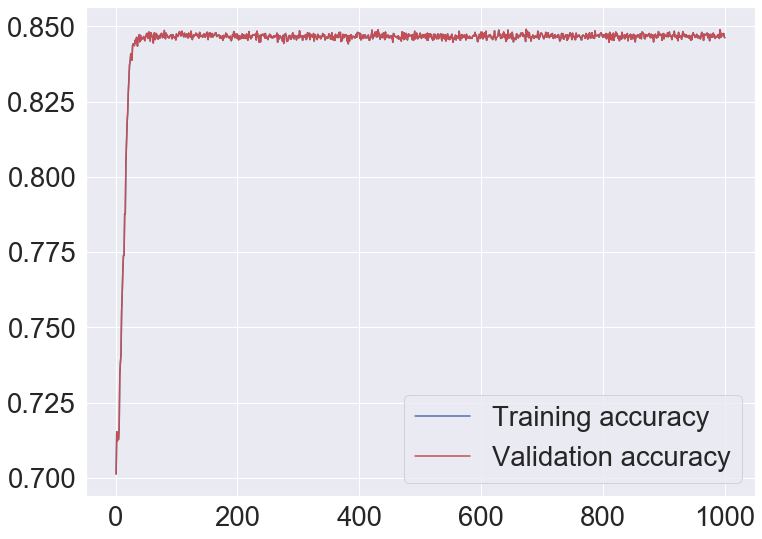

<Figure size 432x288 with 0 Axes>

In [39]:
scaler=MinMaxScaler().fit(X_train)
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)
Model_Deep_DNN=Sequential()
Model_Deep_DNN.add(layers.Dense(32,input_shape=(X_train.shape[1],)))
Model_Deep_DNN.add(layers.Dropout(0.1))
Model_Deep_DNN.add(layers.Dense(32))
Model_Deep_DNN.add(layers.Dropout(0.1))
Model_Deep_DNN.add(layers.Dense(32))
Model_Deep_DNN.add(layers.Dropout(0.1))
Model_Deep_DNN.add(layers.Dense(1,activation='sigmoid'))

Model_Deep_DNN.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])
history=Model_Deep_DNN.fit(X_train,y_train,batch_size=128,epochs=1000,validation_split=0.2)

acc=history.history['accuracy']
val_acc=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['loss']

epochs=range(1,len(acc)+1)
fig,ax = plt.subplots(figsize=(12,9))
plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
# plt.plot(epochs,loss,'b',label='Training loss')
# plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend()
plt.figure()
fig.savefig(problem + '_nn.png',dpi=fig.dpi)
plt.show()

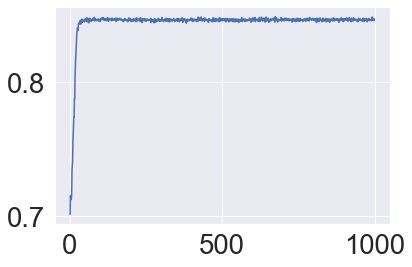

In [40]:
plt.plot(epochs,acc,'b',label='Training accuracy')

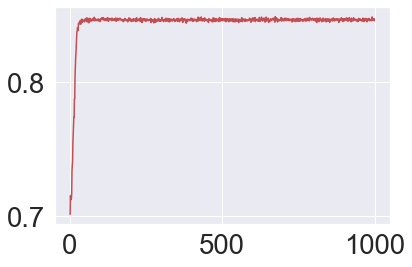

In [41]:
plt.plot(epochs,val_acc,'r',label='Validation accuracy')

In [42]:
y_pred = Model_Deep_DNN.predict(X_test)

In [43]:
y_pred

array([[0.11797217],
       [0.19855535],
       [0.16488436],
       ...,
       [0.25999182],
       [0.12842274],
       [0.14951313]], dtype=float32)